In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint

# Import API key
from config import api_key

base_url = "https://api.nytimes.com/svc/mostpopular/v2/"
viewed = "viewed/"
shared = "shared/"
emailed = "emailed/"
time_1 = "1.json?"
time_7 = "7.json?"
time_30 = "30.json?"

In [2]:
# Most Viewed 30 days

query_url = base_url + viewed + time_30 + "api-key=" + api_key

articles = requests.get(query_url).json()
articles = articles['results']

#prepare lists
title = []
section = []
#keywords = []
pop_rank = []

#fill lists with data
for article in articles:
    title.append(article['title'])
    section.append(article['section'])
    #keywords.append(article['des_facet'])
    pop_rank.append(article['views'])

#convert lists to dict & dataframe
viewed_30 = {'Title': title, 'Section': section, 'Popularity Rank': pop_rank}
viewed_30 = pd.DataFrame(viewed_30)
viewed_30

#extract sections and count
section_pop30 = viewed_30['Section'].value_counts()
#section_pop30.plot(kind = "bar")

In [3]:
# Most Viewed 7 days
query_url = base_url + viewed + time_7 + "api-key=" + api_key

articles = response = requests.get(query_url).json()
articles = articles['results']

#prepare lists
title = []
section = []
#keywords = []
pop_rank = []

#fill lists with data
for article in articles:
    title.append(article['title'])
    section.append(article['section'])
    #keywords.append(article['des_facet'])
    pop_rank.append(article['views'])

#convert lists to dict & dataframe
viewed_7 = {'Title': title, 'Section': section, 'Popularity Rank': pop_rank}
viewed_7 = pd.DataFrame(viewed_7)
viewed_7

#extract sections and count
section_pop7 = viewed_7['Section'].value_counts()
#section_pop7.plot(kind = "bar")

In [4]:
# Most Viewed 1 days
query_url = base_url + viewed + time_1 + "api-key=" + api_key

articles = response = requests.get(query_url).json()
articles = articles['results']

#prepare lists
title = []
section = []
#keywords = []
pop_rank = []

#fill lists with data
for article in articles:
    title.append(article['title'])
    section.append(article['section'])
    #keywords.append(article['des_facet'])
    pop_rank.append(article['views'])

#convert lists to dict & dataframe
viewed_1 = {'Title': title, 'Section': section, 'Popularity Rank': pop_rank}
viewed_1 = pd.DataFrame(viewed_1)
viewed_1

#extract sections and count
section_pop1 = viewed_1['Section'].value_counts()
#section_pop1.plot(kind = "bar")

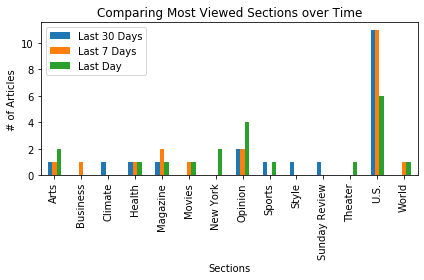

In [5]:
# Most Viewed - Comparing all time frames
view_merge = pd.concat([section_pop30, section_pop7, section_pop1], axis=1,sort=True, join='outer', 
                       keys=['Last 30 Days', 'Last 7 Days', 'Last Day'])

# plot comparison
view_merge.plot(kind="bar", title="Comparing Most Viewed Sections over Time")

# Set labels
plt.ylabel("# of Articles")
plt.xlabel("Sections")

plt.tight_layout()